In [125]:
using JuMP, Ipopt, Printf, Plots
using TestImages, Images, QuartzImageIO, ImageView

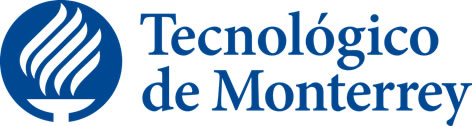

In [138]:
img = load("tec-logo.jpg")

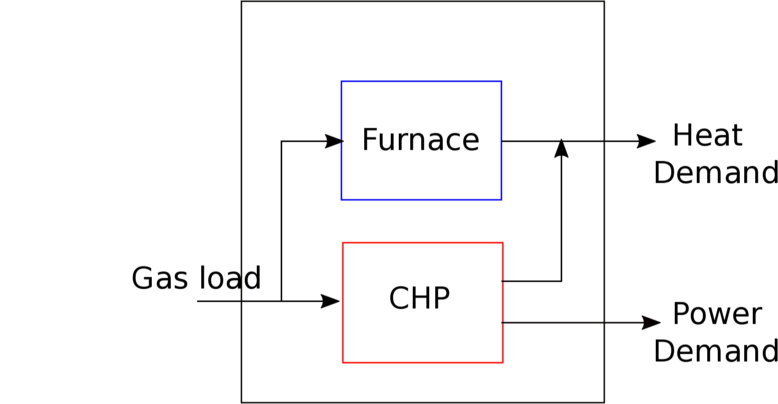

In [137]:
img = load("fig_eh_case2.png")

In [126]:
eta1_gh      = 0.6 ; # Efficiency g->h (fire heater) 
eta2_gh      = 0.7 ; # Efficiency g->h (turbine)
eta2_ge      = 0.5 ; # Efficiency g->e (turbine)

alpha        = 0.3    ; # Natural gas cost coefficient 
beta         = 0.02   ; # Natural gas cost coefficient 

Heat_demand  = 400; # Heat demand [kW]
Power_demand = 600; # Power demand [kW]

In [127]:
EH_Case2 = Model(solver=IpoptSolver());

In [128]:
@variable(EH_Case2, 0 <= nu <= 1, start = 0.5) # Dispatchment factor 
@variable(EH_Case2, Eh_out >=0, start = 0.5*Heat_demand)
@variable(EH_Case2, Ee_out >=0, start = 0.5*Power_demand)
@variable(EH_Case2, Eg_in  >=0, start = 0.5*(Heat_demand+Power_demand));

In [129]:
@NLconstraint(EH_Case2, c1, Eh_out == eta1_gh*(1-nu)*Eg_in + eta2_gh*nu*Eg_in );
@NLconstraint(EH_Case2, c2, Ee_out == eta2_ge*nu*Eg_in);
@NLconstraint(EH_Case2, c3, Eh_out >= Heat_demand);
@NLconstraint(EH_Case2, c4, Ee_out >= Power_demand);
@NLconstraint(EH_Case2, c5, Eg_in >= Eh_out + Ee_out)

Eg_in - (Eh_out + Ee_out) ≥ 0

In [130]:
@NLobjective(EH_Case2, Min, alpha*Eg_in  + beta*Eg_in^2);

In [131]:
status_EH_Case2 = solve(EH_Case2)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        7

Total number of variables............................:        4
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        1
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        3
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

:Optimal

In [132]:
println("Objective function value = ", getobjectivevalue(EH_Case2))
@printf " Gas Load      : %f\n" getvalue(Eg_in)
@printf " Output Heat   : %f\n" getvalue(Eh_out)
@printf " Output Power  : %f\n" getvalue(Ee_out)
@printf " Dispatchment  : %f\n" getvalue(nu)



Objective function value = 65339.99999602849
 Gas Load      : 1800.000000
 Output Heat   : 1200.000000
 Output Power  : 600.000000
 Dispatchment  : 0.666667
